In [1]:
import pandas as pd

In [2]:
# HoBo
df_oo = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/데이터 확인 과정/train_hobosd.csv')

# test = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/test_oom.csv')

In [3]:
# 함수 만들기
def label_encoder(df) :
  # 라이브러리 불러오기
  from sklearn.preprocessing import LabelEncoder
  # 인코딩할 칼럼 추출
  df_categorical = df.select_dtypes(include=['object']).columns
  # 식별자 ID 제외하기
  df_categorical = df_categorical.drop('ID')
  # 라벨 인코딩 적용
  label_encoder = LabelEncoder()
  df[df_categorical] = df[df_categorical].apply(label_encoder.fit_transform)

In [4]:
label_encoder(df_oo)

In [5]:
# # # features와 label 분리 작업 + 연령대로 머신러닝
X_features = df_oo.loc[:,(df_oo.columns != 'ID') & (df_oo.columns != 'Income')]
y_label = df_oo['Income']

In [6]:
# train_ test분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 42)

In [7]:
# 평가지표
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
import numpy as np

def evaluation(y_test, y_pred) :
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  # MdAPE를 잘 쓰곤 함. 직관적이여서(외부공유)
  mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100
  mape = mean_absolute_percentage_error(y_test,y_pred)
  print('rmse : {}, mae : {}, mdape : {}, mape : {}'.format(rmse, mae, mdape, mape ))

## Lgbm

In [8]:
from lightgbm import LGBMRegressor
import lightgbm as lgbm

In [9]:
# 모델
lgbm_model = LGBMRegressor()
# 학습
lgbm_model.fit(X_train, y_train)
# 예측
lgbm_pred = lgbm_model.predict(X_test)
# 평가
evaluation(y_test, lgbm_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1226
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
rmse : 592.5308805294699, mae : 327.16343271448125, mdape : 55.90465842529353, mape : 6.263291712718911e+17


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

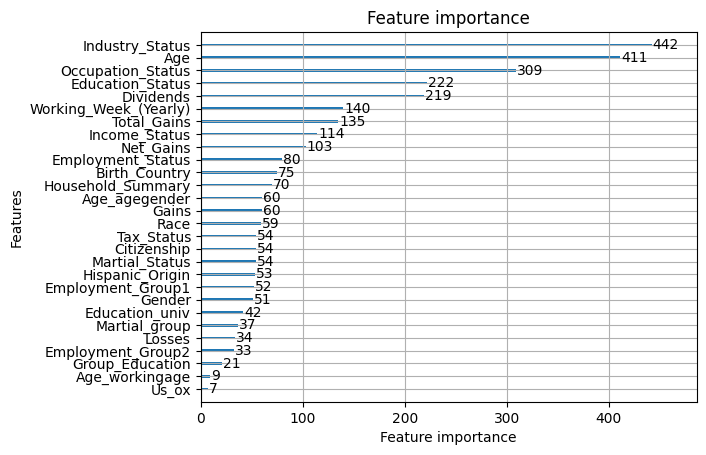

In [10]:
lgbm.plot_importance(lgbm_model)

## feature Importance

In [11]:
list_col = lgbm_model.feature_importances_
index_x = X_train.columns

# 딕셔너리 생성
data_dict = {'index_column': X_train.columns, 'list_column': list_col}

# 데이터프레임 생성
df_feature = pd.DataFrame(data_dict)

In [12]:
# 내림차순 정렬
df_feature = df_feature.sort_values(by = 'list_column', ascending = False)

In [ ]:
df_feature

In [14]:
# feature importance 순서대로 추출
fe_list = list(df_feature['index_column'])

In [ ]:
# # 중요도에 따른 피처 추출
# fi = lgbm_model.feature_importances_
# df_col = X_train.columns
# fi_list = []
# for i in range(len(fi)):
#   if fi[i] >= 0:
#     fi_list.append(df_col[i])
#   else :
#     continue

In [ ]:
# fi_list

In [15]:
len(fe_list)

32

In [28]:
fe_list[31:32]

['Race_yn']

In [ ]:
n = 32
while n > 0 :
  X_f = df_oo[fe_list[:n]]
  from sklearn.model_selection import train_test_split
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X_f, y_label, test_size = 0.2, random_state = 42)
  # 모델
  lgbm_model2 = LGBMRegressor()
  # 학습
  lgbm_model2.fit(X_train2, y_train2)
  # 예측
  lgbm_pred2 = lgbm_model2.predict(X_test2)
  # 평가
  print( '{} 번째'.format(n))
  print(fe_list[:n])
  evaluation(y_test2, lgbm_pred2)
  n = n - 1

In [ ]:
# ['Age_range', 'Native_yn', 'Allother_yn', 'Race_yn'] feature importance == 0

In [ ]:
# from sklearn.feature_selection import RFE
# from lightgbm import LGBMRegressor
# import lightgbm as lgbm

In [ ]:
# lgbm_model3 = LGBMRegressor()

# rfe = RFE(estimator=lgbm_model3, n_features_to_select=21)

In [ ]:
# # RFE를 사용하여 특성 선택
# X_selected = rfe.fit_transform(X_train, y_train)

# # 선택된 특성 확인
# selected_features = rfe.support_
# print("선택된 특성:", selected_features)

# # 선택된 특성만 사용하여 모델 재학습
# lgbm_model3.fit(X_selected, y_train)

# # 모델 평가
# score = lgbm_model3.score(X_selected, y_train)
# print("모델 평가 점수:", score)

In [32]:
# selected_features

NameError: name 'selected_features' is not defined

In [ ]:
# # 중요도에 따른 피처 추출
# df_col = X_train.columns
# fe_list = []
# for i in range(len(selected_features)):
#   if selected_features[i] == 0:
#     fe_list.append(df_col[i])
#   else :
#     continue

## Shap

## 소거법